# 4. Identify Recharge Potential Areas
## Objective: Use groundwater trends to locate wards that could benefit from water recharge/storage interventions.
### Method:
Identify wards with significant post-monsoon rises (indicating good recharge potential).
Flag wards with consistently low levels for targeted interventions.
### Insights:
Suggest specific wards for artificial recharge structures like check dams or rainwater harvesting.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
file_path = "chennai-ground-water-levels-2023.csv"  # Replace with your file path
df = pd.read_csv(file_path)

In [3]:
df.head()

,S.No.,Area No.,Dept No.,Location,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1.0,I,1.0,Kathivakkam,1.48,1.520,1.462,1.50,1.53,1.554,1.688,1.599,1.610,1.53,1.29,1.38
1,2.0,I,2.0,Kathivakkam,3.26,3.293,3.310,3.36,3.36,3.382,3.416,3.459,3.470,3.48,3.35,3.268
2,3.0,I,3.0,Ernavoor,2.01,2.236,2.244,2.24,2.14,2.166,2.231,2.51,2.264,2.24,1.82,1.91
3,4.0,I,4.0,Sadaiyankuppam,3.67,3.745,3.661,3.66,3.65,3.638,3.808,4.01,3.646,3.67,3.27,3.125
4,5.0,I,5.0,Kamadhenu Nagar,3.45,3.492,3.439,3.31,3.41,3.151,3.499,3.28,3.393,3.2,3.07,3.157


In [4]:
# Columns for monthly groundwater levels
monthly_columns = ["Jan ", "Feb", "Mar", "Apr ", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]


In [5]:
# Ensure the monthly columns are numeric
df[monthly_columns] = df[monthly_columns].apply(pd.to_numeric, errors='coerce')

In [8]:
# Step 1: Identify Wards with Significant Post-Monsoon Rises
# Calculate difference between October (post-monsoon) and June (pre-monsoon)
df["Post-Monsoon Rise"] = df["Oct"] - df["Jun"]

# Flag wards with significant rises (e.g., > mean rise)
mean_rise = df["Post-Monsoon Rise"].mean()
df["Recharge Potential"] = df["Post-Monsoon Rise"].apply(lambda x: "High" if x > mean_rise else "Low")

In [9]:
# Step 2: Identify Wards with Consistently Low Levels
# Calculate yearly average groundwater level
df["Yearly Average"] = df[monthly_columns].mean(axis=1)

# Flag wards with consistently low levels (e.g., below 25th percentile of yearly average)
low_level_threshold = df["Yearly Average"].quantile(0.25)
df["Low Level"] = df["Yearly Average"].apply(lambda x: "Yes" if x < low_level_threshold else "No")

In [10]:
# Step 3: Highlight Recharge Potential Areas
recharge_areas = df[(df["Recharge Potential"] == "High") | (df["Low Level"] == "Yes")]


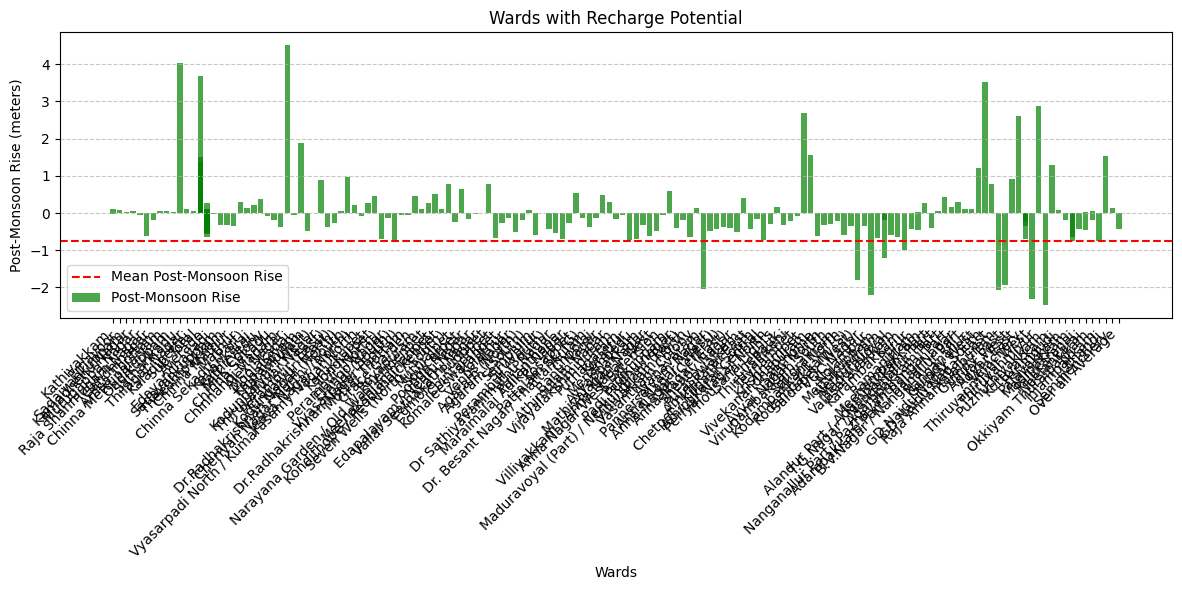

In [11]:
# Step 4: Visualization
# Bar plot for recharge potential
plt.figure(figsize=(12, 6))
plt.bar(recharge_areas["Location"], recharge_areas["Post-Monsoon Rise"], color="green", alpha=0.7, label="Post-Monsoon Rise")
plt.axhline(y=mean_rise, color="red", linestyle="--", label="Mean Post-Monsoon Rise")
plt.title("Wards with Recharge Potential")
plt.xlabel("Wards")
plt.ylabel("Post-Monsoon Rise (meters)")
plt.xticks(rotation=45, ha="right")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


In [12]:
# Step 5: Display Insights
print("\nWards with High Recharge Potential or Consistently Low Levels:")
print(recharge_areas[["Location", "Yearly Average", "Post-Monsoon Rise", "Recharge Potential", "Low Level"]])


Wards with High Recharge Potential or Consistently Low Levels:
             Location  Yearly Average  Post-Monsoon Rise Recharge Potential  \
0         Kathivakkam        1.511917          -0.024000               High   
1         Kathivakkam        3.367333           0.098000               High   
2            Ernavoor        2.167583           0.074000               High   
3      Sadaiyankuppam        3.629417           0.032000               High   
4     Kamadhenu Nagar        3.320917           0.049000               High   
..                ...             ...                ...                ...   
223       Injampakkam        6.208333          -0.748000               High   
226           Uthandi        1.846091           1.520000               High   
227       Semmenchery        3.961333           0.145000               High   
229           Average        3.675243          -0.377222               High   
231  Over all Average        4.554744          -0.423429           

In [13]:
import pandas as pd

# Set Pandas options to display all rows and columns
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns

# Print all rows of the declining trends DataFrame
print("\nWards with High Recharge Potential or Consistently Low Levels:")
print(recharge_areas[["Location", "Yearly Average", "Post-Monsoon Rise", "Recharge Potential", "Low Level"]])

# Reset Pandas options (optional)
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')


Wards with High Recharge Potential or Consistently Low Levels:
                                      Location  Yearly Average  \
0                                  Kathivakkam        1.511917   
1                                  Kathivakkam        3.367333   
2                                     Ernavoor        2.167583   
3                               Sadaiyankuppam        3.629417   
4                              Kamadhenu Nagar        3.320917   
5                              Murugappa Nagar        1.554417   
6                         Raja Shanmugam Nagar        1.649250   
7                                  Gandhinagar        3.766750   
8                                 Amsa Thottam        6.747333   
9                         Chinna Mettupalaiyam        5.153167   
10                                  Ondikuppam        4.340917   
11                                  Sathankadu        3.077250   
12                              Thilagar Nagar        1.379417   
13          

In [ ]:
# Optional: Save results to CSV for detailed analysis
# recharge_areas.to_csv("recharge_potential_areas.csv", index=False)

Explanation of Code
Post-Monsoon Rises:

Calculates the difference in groundwater levels between October (post-monsoon) and June (pre-monsoon).
Flags wards with significant rises (above the mean) as having High Recharge Potential.
Consistently Low Levels:

Calculates the yearly average groundwater level for each ward.
Flags wards with averages below the 25th percentile as having Consistently Low Levels.
Combined Results:

Identifies wards that either have high recharge potential or consistently low levels for targeted interventions.
Visualization:

A bar chart highlights wards with recharge potential, showing the post-monsoon rise.
Export:

Saves the results to a CSV file (recharge_potential_areas.csv) for further use.
Output
Wards with Recharge Potential:

A DataFrame showing key metrics like yearly average, post-monsoon rise, recharge potential, and low-level status.
Bar Chart:

Visualizes wards with high post-monsoon rises relative to the mean.
Export:

A CSV file with the results for additional analysis.
